In [65]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

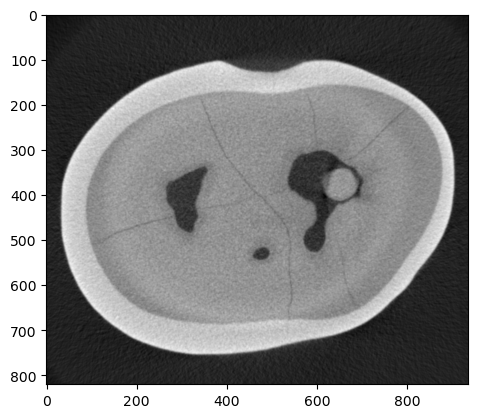

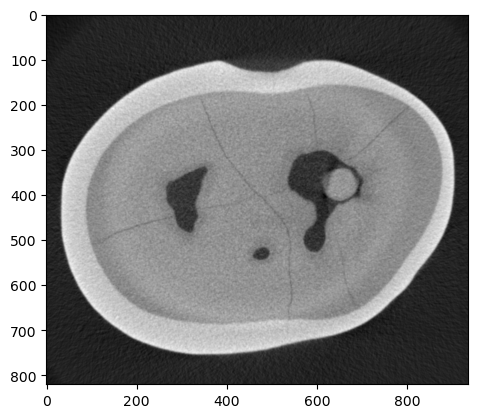

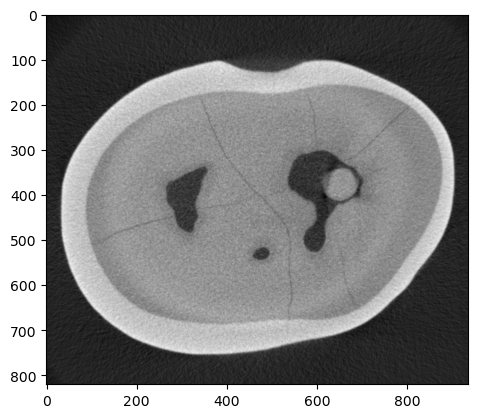

In [66]:
image_hamming = tiff.imread('Hamming_slice_0783.tif')
image_logan = tiff.imread('logan_slice_0783.tif')
image_ramlak = tiff.imread('ramlak_slice_0783.tif')

plt.figure()
plt.imshow(image_hamming, cmap="gray")

plt.figure()
plt.imshow(image_logan, cmap="gray")

plt.figure()
plt.imshow(image_ramlak, cmap="gray")

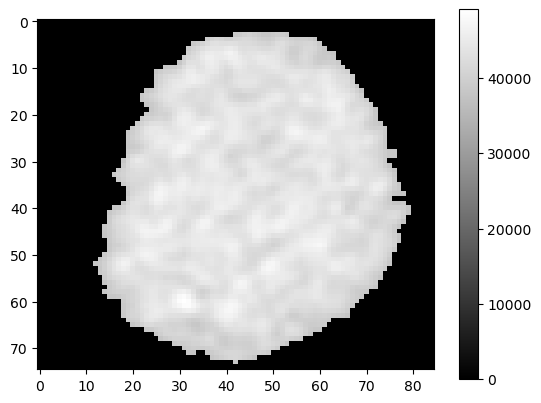

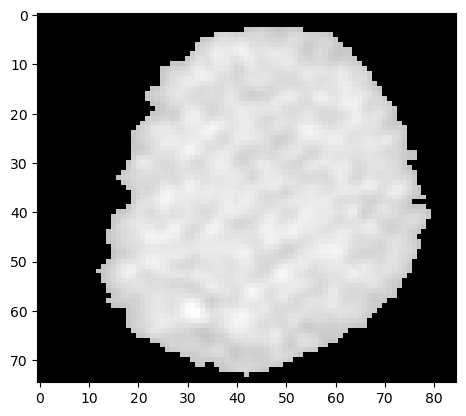

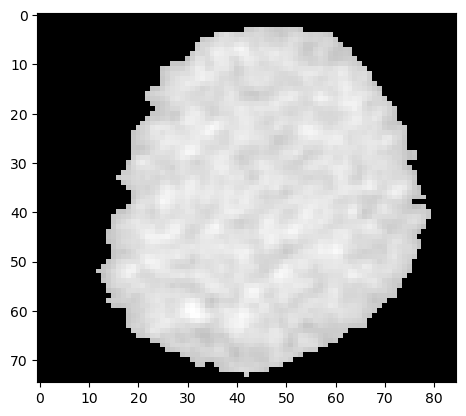

In [67]:
signal_hamming = image_hamming[340:415, 610:695]
signal_logan = image_logan[340:415, 610:695]
signal_ramlak = image_ramlak[340:415, 610:695]

mask = signal_hamming > 38000 # Array of 0's and 1's. There are 1's where "signal_hamming" is > 38000
mask[0:10, 75:] = 0 # We eliminate parts (features) which are included in the mask but are not of our interest
mask[69:, 63:] = 0
mask[30:40, 5:15] = 0

signal_hamming_masked = signal_hamming*mask
signal_logan_masked = signal_logan*mask
signal_ramlak_masked = signal_ramlak*mask

plt.figure()
plt.imshow(signal_hamming_masked, cmap="gray")
plt.colorbar()

plt.figure()
plt.imshow(signal_logan_masked, cmap="gray")

plt.figure()
plt.imshow(signal_ramlak_masked, cmap="gray")

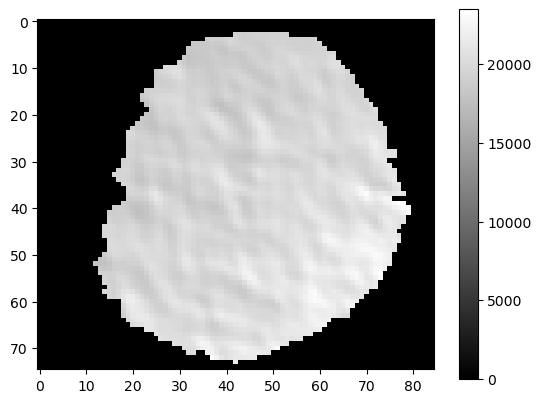

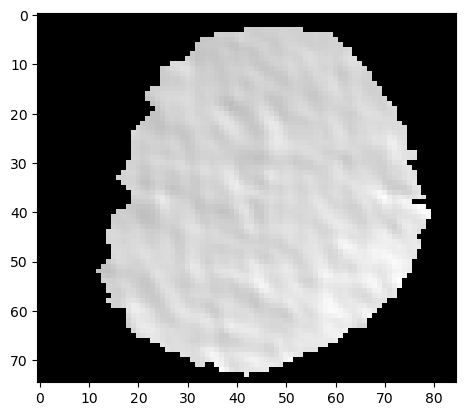

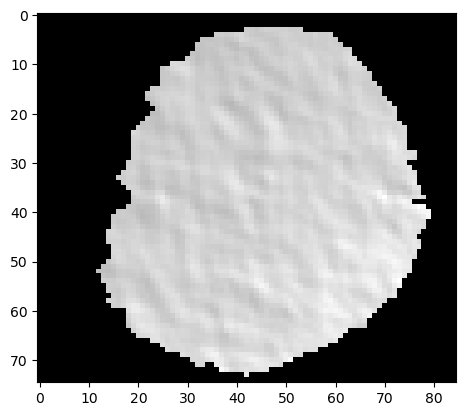

In [68]:
background_hamming = image_hamming[0:75, 0:85] # select a background zone of the same size as the signal (75x85)
background_logan = image_logan[0:75, 0:85]
background_ramlak = image_ramlak[0:75, 0:85]

background_hamming_masked = background_hamming*mask # We apply the mask for the background too, to select a region with the same shape as the signal
background_logan_masked = background_logan*mask
background_ramlak_masked = background_ramlak*mask

plt.figure()
plt.imshow(background_hamming_masked, cmap="gray")
plt.colorbar()

plt.figure()
plt.imshow(background_logan_masked, cmap="gray")

plt.figure()
plt.imshow(background_ramlak_masked, cmap="gray")

In [69]:
mean_signal_hamming =  np.mean(signal_hamming_masked[np.nonzero(signal_hamming_masked)]) # We found the mean value of "signal_hamming_masked" only taking into account the non-zero values
std_signal_hamming =  np.std(signal_hamming_masked[np.nonzero(signal_hamming_masked)])

mean_signal_logan =  np.mean(signal_logan_masked[np.nonzero(signal_logan_masked)])
std_signal_logan =  np.std(signal_logan_masked[np.nonzero(signal_logan_masked)])

mean_signal_ramlak =  np.mean(signal_ramlak_masked[np.nonzero(signal_ramlak_masked)])
std_signal_ramlak =  np.std(signal_ramlak_masked[np.nonzero(signal_ramlak_masked)])

In [70]:
mean_background_hamming =  np.mean(background_hamming_masked[np.nonzero(background_hamming_masked)]) # We found the mean value of "background_hamming_masked" only taking into account the non-zero values
std_background_hamming =  np.std(background_hamming_masked[np.nonzero(background_hamming_masked)])

mean_background_logan =  np.mean(background_logan_masked[np.nonzero(background_logan_masked)])
std_background_logan =  np.std(background_logan_masked[np.nonzero(background_logan_masked)])

mean_background_ramlak =  np.mean(background_ramlak_masked[np.nonzero(background_ramlak_masked)])
std_background_ramlak =  np.std(background_ramlak_masked[np.nonzero(background_ramlak_masked)])

In [71]:
CNR_hamming = (mean_signal_hamming - mean_background_hamming)/std_background_hamming
CNR_logan = (mean_signal_logan - mean_background_logan)/std_background_logan
CNR_ramlak = (mean_signal_ramlak - mean_background_ramlak)/std_background_ramlak

In [72]:
print("CNR using Hamming filter is: ", CNR_hamming)
print("CNR using Logan filter is: ", CNR_logan)
print("CNR using Ramlak filter is: ", CNR_ramlak)

CNR using Hamming filter is:  23.444689308739758
CNR using Logan filter is:  22.961361630791995
CNR using Ramlak filter is:  21.234233785960036
